In [141]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Layer
import matplotlib.pyplot as plt


In [142]:
# Parámetros configurables
archivo_muestras = "datos_audio.csv"
archivo_salidas = "datos_audio_no_cavitacion.csv"

# Configuración del modelo
neuronas_por_capa = [300,200,100,1]
activaciones = ['relu', 'relu', 'relu',"sigmoid"]
"""
relu = es lineal si es mayor que 0, es 0 si  es negativo
sigmoid = varia entre 0 y 1
tanh = varia entre -1 y 1
linear = lineal
"""
# Configuración de entrenamiento
learning_rate = 0.001
batch_size = 1
epochs = 1500 #iteracones del entrenamiento
optimizador = 'rmsprop' # adam,sgd,rmsprop.
pérdida = 'BinaryCrossentropy' #mse,mae,rmse ,BinaryCrossentropy,etc.

# parametros de normalizacion
normalizacion=1 #normalizacion de entrada
factor_de_salida=1 #normalizacion de salida

In [ ]:
# Función para cargar y normalizar datos
def cargar_datos(nombre_archivos_entrada, nombre_archivos_salida, normalizacion, factor_salida):
    entradas = pd.read_csv(nombre_archivos_entrada, header=None)
    salidas = pd.read_csv(nombre_archivos_salida, header=None)
    
    # Normalizar entradas
    X = entradas.values / normalizacion
    # Reescalar las salidas
    y = salidas.values / factor_salida
    
    return X, y


# Función para crear el modelo
def crear_modelo(num_capas, neuronas_por_capa, activaciones, input_dim):
    if len(neuronas_por_capa) != len(activaciones):
        raise ValueError("La longitud de 'neuronas_por_capa' debe coincidir con 'activaciones'.")

    modelo = Sequential()
    modelo.add(Input(shape=(input_dim,)))
    
    for i in range(num_capas):
        modelo.add(Dense(neuronas_por_capa[i], activation=activaciones[i]))
    
    return modelo

# Función para entrenar el modelo
def entrenar_modelo(modelo, X_train, y_train, learning_rate, batch_size, epochs, optimizador, pérdida):
    if optimizador == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizador == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizador == 'rmsprop':
        opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError(f"Optimizador {optimizador} no soportado.")

    modelo.compile(optimizer=opt, loss=pérdida, metrics=['accuracy'])
    historia = modelo.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1
    )
    return historia


# Función para graficar el historial de entrenamiento
def graficar_historial(historia):
    plt.figure(1,figsize=(12, 6))
    plt.plot(historia.history['loss'], label='Pérdida (Loss)')
    plt.title("Evolución del entrenamiento")
    plt.xlabel("Épocas")
    plt.ylabel("Métrica")
    plt.yscale("log")
    plt.legend()
    plt.grid(True)
    
    plt.figure(2,figsize=(12, 6))
    plt.plot(historia.history['accuracy'], label='Exactitud (Accuracy)')
    plt.title("Evolución del entrenamiento")
    plt.xlabel("Épocas")
    plt.ylabel("Métrica")
    plt.legend()
    plt.grid(True)
    plt.show()


In [144]:
# Generar datos de entrenamiento
x_train1, x_train2 = cargar_datos(archivo_muestras,archivo_salidas,normalizacion,factor_de_salida)
x_train=np.concatenate([x_train1,x_train2])
y_train=np.concatenate((np.ones(len(x_train1)), np.zeros(len(x_train2)))).reshape(-1, 1)
# Crear el modelo
num_capas=len(activaciones)
input_dim = x_train.shape[1]
modelo = crear_modelo(num_capas, neuronas_por_capa, activaciones, input_dim)

In [145]:
# Entrenar el modelo
historia = entrenar_modelo(
    modelo, x_train, y_train,
    learning_rate, batch_size, epochs, optimizador, pérdida
)

Epoch 1/1500
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - accuracy: 0.8062 - loss: 0.4892 
Epoch 2/1500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - accuracy: 0.9348 - loss: 0.1969
Epoch 3/1500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.9386 - loss: 0.1217   
Epoch 4/1500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9909 - loss: 0.0752  
Epoch 5/1500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9856 - loss: 0.0378   
Epoch 6/1500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9200 - loss: 0.1043 
Epoch 7/1500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 980us/step - accuracy: 0.9746 - loss: 0.0462 
Epoch 8/1500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9890 - loss: 0.0262   
Epoch 9/1500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9725 - loss: 0.0863   
Epoch 10/1500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 929us/step - accuracy: 0.9908 - loss: 0.0338
Epoch 11/1500
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.9604 - loss: 0.1114 
Epoch 12/1500
60/60 ━━

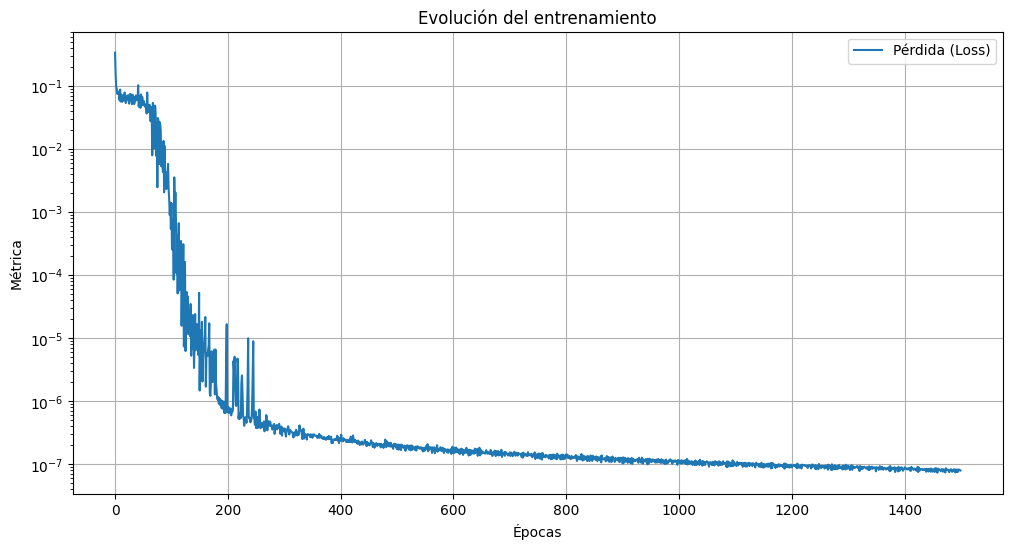

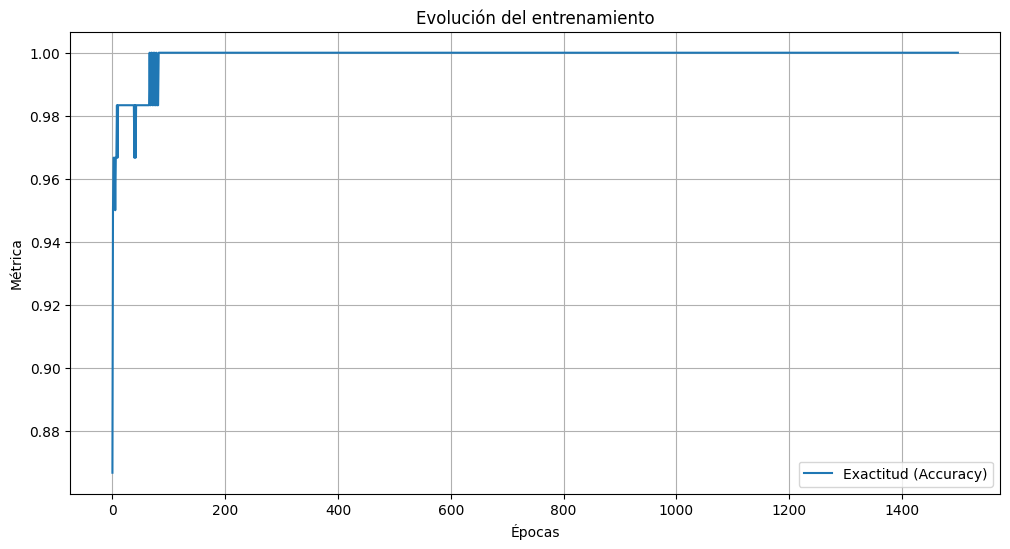

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_135 (Dense)               │ (None, 300)            │        38,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 200)            │        60,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_138 (Dense)               │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,204 (930.49 KB)

 Trainable params: 119,101 (465.24 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 119,103 (465.25 KB)

In [146]:
# Graficar historial de entrenamiento
graficar_historial(historia)
modelo.summary()
modelo.save("cavitacion.h5")

In [ ]:
prediccion=np.array([[2000,2000]])/normalizacion  


print(modelo.predict(prediccion)*factor_de_salida)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
[[968844.6]]
